<a href="https://colab.research.google.com/github/himanshuarora1703/codebasics-ML-exercise/blob/main/SVM/Support_vector_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [7]:
data = load_digits()

df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
data['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [54]:
# make X and y

X = df.copy()
y = data['target']

In [12]:
y.shape

(1797,)

In [13]:
# do train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train.shape,X_test.shape

((1437, 64), (360, 64))

In [40]:
# train the model

from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

# predict the outcome
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print('The train accuracy is',train_acc)
print('The test accuracy is',test_acc)

The train accuracy is 0.9944328462073765
The test accuracy is 0.9888888888888889


In [42]:
# do cross validation

from sklearn.model_selection import cross_validate,validation_curve

val = cross_validate(svc,X_train,y_train,cv=5,scoring='accuracy',return_train_score=True)

val

{'fit_time': array([0.04129362, 0.03535891, 0.03400517, 0.03402209, 0.03878093]),
 'score_time': array([0.01657653, 0.01687813, 0.01686335, 0.01572752, 0.01551008]),
 'test_score': array([0.97916667, 0.98263889, 0.99303136, 0.99303136, 0.98606272]),
 'train_score': array([0.99477807, 0.99564839, 0.99478261, 0.99217391, 0.99565217])}

In [31]:
val_dict = {}

for key,val in val.items():
    val_dict[key] = np.mean(val)

val_dict

{'fit_time': 0.03592500686645508,
 'score_time': 0.016954374313354493,
 'test_score': 0.986786198219125,
 'train_score': 0.9946070306883114}

In [33]:
validation_curve(svc,X_train,y_train,param_name='C',param_range=np.arange(0.1,1.1,10),cv=5,scoring='accuracy')

(array([[0.96605744, 0.95039164, 0.95652174, 0.94869565, 0.95304348]]),
 array([[0.92361111, 0.95138889, 0.94076655, 0.96167247, 0.94773519]]))

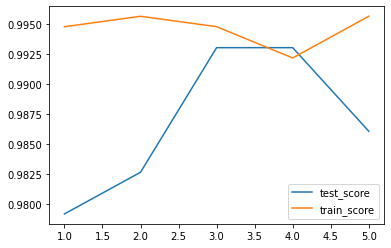

In [44]:
for name in list(val.keys())[2:]:
    x = np.arange(1,6)
    y = val[name]
    plt.plot(x,y,label=name)
    plt.legend()

In [46]:
# do grid search

from sklearn.model_selection import GridSearchCV
params1 = {'kernel':['rbf','sigmoid'],'gamma':[0.1,1,10,100],'C':[1,5,10,20,100]}
params2 = {'kernel':['linear'],'C':[1,5,10,20,100]}
search = GridSearchCV(svc,[params1,params2],cv=5,scoring='accuracy',verbose=2)

In [47]:
# fit the grid search

search.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 5, 10, 20, 100], 'gamma': [0.1, 1, 10, 100],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [1, 5, 10, 20, 100], 'kernel': ['linear']}],
             scoring='accuracy', verbose=2)

In [48]:
# best score
search.best_score_

0.9763525938830815

In [50]:
#best_params

search.best_params_

{'C': 1, 'kernel': 'linear'}

In [51]:
# train the model with best parameters

from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train,y_train)

# predict the outcome
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print('The train accuracy is',train_acc)
print('The test accuracy is',test_acc)

The train accuracy is 1.0
The test accuracy is 0.9888888888888889


In [56]:
# do cross validation 

from sklearn.model_selection import cross_val_score

score = cross_val_score(svc,X,y,cv=10,scoring='accuracy')

print('the mean score is',np.mean(score))

the mean score is 0.9604872749844816


In [57]:
# do cross validation on train set

from sklearn.model_selection import cross_val_score

score = cross_val_score(svc,X_train,y_train,cv=10,scoring='accuracy')

print('the mean score is',np.mean(score))

the mean score is 0.9735674048174049
